In [1]:
import pandas as pd
import numpy as np
from analysis.utilities import *
from matplotlib import pyplot as plt
%matplotlib inline

/Users/eggeek/anaconda2/envs/py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [17]:
a0 = pd.read_csv("arena3-subopt.out")
a1 = pd.read_csv("arena3-cut-inv-subopt.out")

b0 = pd.read_csv("brc000d3-subopt.out")
b1 = pd.read_csv("brc000d3-cut-inv-subopt.out")

c0 = pd.read_csv("brc101d3-subopt.out")
c1 = pd.read_csv("brc101d3-cut-inv-subopt.out")

In [18]:
a0 = a0[a0.tcost > 0.0]
a1 = a1[a1.tcost > 0.0]

b0 = b0[b0.tcost > 0.0]
b1 = b1[b1.tcost > 0.0]

c0 = c0[c0.tcost > 0.0]
c1 = c1[c1.tcost > 0.0]

In [19]:
def cmp(df1, df2):
    x1, y1 = gen_xy(df1, 'steps', 'access', limit=0)
    x2, y2 = gen_xy(df2, 'steps', 'access', limit=0)
    plot_graph(xlabel='steps', ylabel='access', xs=[x1,x2], ys=[y1,y2], labels=['forward', 'inverse'], yscale='linear')

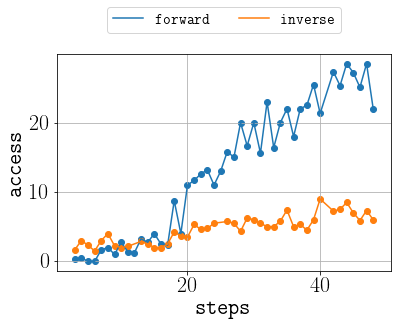

In [20]:
cmp(a0, a1)

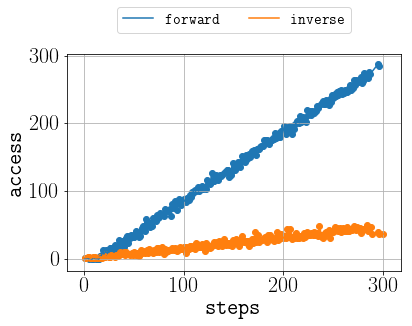

In [21]:
cmp(b0, b1)

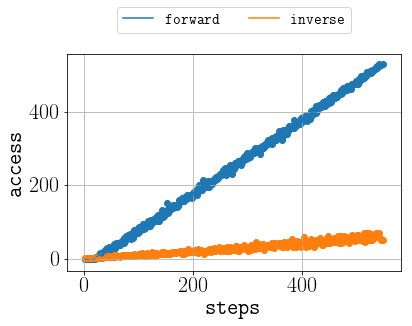

In [22]:
cmp(c0, c1)

In [8]:
(a0.tcost / a1.tcost).describe()

count    160.000000
mean       1.079638
std        0.233518
min        0.640845
25%        0.933024
50%        1.073691
75%        1.223327
max        1.856954
Name: tcost, dtype: float64

In [9]:
(b0.tcost / b1.tcost).describe()

count    850.000000
mean       2.718672
std        0.693448
min        0.438596
25%        2.431403
50%        2.797019
75%        3.134929
max        5.230307
Name: tcost, dtype: float64

In [10]:
(c0.tcost / c1.tcost).describe()

count    1570.000000
mean        2.283790
std         0.592804
min         0.373641
25%         2.023427
50%         2.401915
75%         2.704684
max         3.846117
Name: tcost, dtype: float64

In [11]:
c1["diff"] = abs(c1.distance - c1.expect)

In [12]:
c1["ratio"] = c1["diff"] / c1["expect"]

c1["ratio"].describe()

In [15]:
c1["ratio"].quantile(0.99)

0.6308339918993924

In [25]:
c1["ratio"].quantile(0.99)

0.5199042465487898

In [16]:
c1[c1["ratio"] >= c1["ratio"].quantile(0.90)]

,map,scenid,tcost,distance,expect,steps,access,hLevel,diff,ratio
0,brc101d,0,545,7.82843,3.82843,7,2,3,4.00000,1.044815
1,brc101d,1,526,7.24264,3.82843,6,2,3,3.41421,0.891804
2,brc101d,2,333,4.00000,2.00000,4,2,3,2.00000,1.000000
3,brc101d,3,353,3.41421,1.41421,3,2,3,2.00000,1.414217
4,brc101d,4,535,12.24260,1.41421,11,2,3,10.82839,7.656847
5,brc101d,5,563,12.89950,2.41421,10,3,3,10.48529,4.343156
6,brc101d,6,419,14.07110,2.41421,12,2,3,11.65689,4.828449
7,brc101d,7,531,7.24264,2.41421,6,2,3,4.82843,2.000004
8,brc101d,8,316,7.24264,3.00000,6,2,3,4.24264,1.414213
9,brc101d,9,660,8.65685,2.41421,7,3,3,6.24264,2.585790


In [23]:
c1["diff"] = abs(c1.distance - c1.expect)

In [24]:
c1["ratio"] = c1["diff"] / c1["expect"]

In [26]:
c1[c1["ratio"] >= c1["ratio"].quantile(0.90)]

,map,scenid,tcost,distance,expect,steps,access,hLevel,diff,ratio
0,brc101d,0,499,7.82843,3.82843,7,2,3,4.00000,1.044815
1,brc101d,1,437,7.24264,3.82843,6,2,3,3.41421,0.891804
2,brc101d,2,378,3.00000,2.00000,3,2,3,1.00000,0.500000
3,brc101d,3,371,2.41421,1.41421,2,2,3,1.00000,0.707109
4,brc101d,4,522,11.24260,1.41421,10,2,3,9.82839,6.949739
5,brc101d,5,592,12.89950,2.41421,10,3,3,10.48529,4.343156
6,brc101d,6,451,8.24264,2.41421,7,2,3,5.82843,2.414218
7,brc101d,7,454,4.82843,2.41421,4,2,3,2.41422,1.000004
8,brc101d,8,352,7.24264,3.00000,6,2,3,4.24264,1.414213
9,brc101d,9,509,8.65685,2.41421,7,3,3,6.24264,2.585790


In [41]:
opt = pd.read_csv("brc101d-opt-vanilla-inspect.out")
subopt = pd.read_csv("brc101d-subopt-vanilla-inspect.out")

In [45]:
sum(opt.runs)

459787

In [46]:
sum(subopt.runs)

12467

In [47]:
29882 / 883.0

33.84144960362401

In [42]:
opt.runs.describe()

count    29882.000000
mean        15.386755
std         18.237266
min          1.000000
25%          2.000000
50%          5.000000
75%         23.000000
max        142.000000
Name: runs, dtype: float64

In [43]:
subopt.runs.describe()

count    883.000000
mean      14.118913
std       16.867044
min        1.000000
25%        2.000000
50%        4.000000
75%       21.000000
max      114.000000
Name: runs, dtype: float64